# Identifying POI from Enron Dataset
### Final Project - Machine Learning Course
### Udacity Data Analyst Nanodegree

This is the final project for the machine learning course. Enron financial data and email data will be investigated to find the list of person of interest (POI) who were involved in the fraud activities.

Below is the order of the investigation process I will employ for this final project.
- Univariate analysis
    - Process the dataset (taking care of missing values and outliers)
    - Select good features that don't have too many zeros or missing values
    - Calculate accuracy, precision and recall for each feature I selected using classifiers with default parameters.
- Bivariate analysis 
    - Find features that can be dimensionally reduced through PCA
    - Calculate accuracy, precision and recall from a pair of features using more classifiers and various parameters.
- Dimension Reduction
    - Apply PCA to features I choose during bivariate analysis
    - Calculate accuracy, precision and recall from features with the best scores from univariate and bivariate analysis.

First, necessary Libraries will be loaded.

In [1]:
#!/usr/bin/python

import sys
import pickle
import pprint
import matplotlib.pyplot as plt
import numpy as np

### Setting the path
sys.path.append("../tools/")

### These are the scripts given in the class
from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

Load the dictionary containing the dataset.

In [2]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [3]:
len(data_dict)

146

There are total 146 number of data in data_dict. I am going to print out the first two of the data from data_dict to see how the dictionary looks like.

In [4]:
stop = 0
for k, v in data_dict.iteritems():
    print k
    pprint.pprint(v)
    if stop == 1:
        break
    stop += 1

METTS MARK
{'bonus': 600000,
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'mark.metts@enron.com',
 'exercised_stock_options': 'NaN',
 'expenses': 94299,
 'from_messages': 29,
 'from_poi_to_this_person': 38,
 'from_this_person_to_poi': 1,
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 1740,
 'poi': False,
 'restricted_stock': 585062,
 'restricted_stock_deferred': 'NaN',
 'salary': 365788,
 'shared_receipt_with_poi': 702,
 'to_messages': 807,
 'total_payments': 1061827,
 'total_stock_value': 585062}
BAXTER JOHN C
{'bonus': 1200000,
 'deferral_payments': 1295738,
 'deferred_income': -1386055,
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 6680544,
 'expenses': 11200,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 1586055,
 'other': 2660303,
 'poi': False,
 'restricted_stock': 3942714,
 'rest

The keys of data_dict are the names of people and the values are various features. Every feature except poi and email_address are numerical values. It looks like it is either a number of 'NaN' when the data is missing. And poi is a boolean value that I can use to find POI's.

In [5]:
### Finding the number of features
for k,v in data_dict.iteritems():
    print "The number of features:", len(v)
    features_list = v.keys() # features are saved separately for later use
    break

The number of features: 21


There are total 21 features in the dataset. I will ignore "email_address" because they are not numerical values. And I will ingore 'other' as well because I don't know what this is.

In [6]:
### Removing poi and email_address
try:
    features_list.remove("email_address")
    features_list.remove("other")
except:
    pass

### Convert data_dict into numpy array
data = featureFormat(data_dict, features_list)
print "The type of data:", type(data)
print "The total number of data", data.shape

The type of data: <type 'numpy.ndarray'>
The total number of data (145L, 19L)


Now the data_dict is converted to numpy array. And it contains 145 rows and 19 columns. 
featureFormat ignores the "NaN" values and creates numpy array that I can use it for the analysis more easily.

Using data numpy array I will check the number of poi's and non-poi's.

In [7]:
### Finding the index of poi
poi_ind = features_list.index("poi")

### Print out the number of poi and non-poi
print "The total number of poi:", np.sum(data[:,poi_ind])
print "The total number of non-poi:", np.size(data[:,poi_ind]) - np.sum(data[:,poi_ind])

The total number of poi: 18.0
The total number of non-poi: 127.0


There are total 18 POI and 127 non-POI.

In [8]:
### Move poi column to the end
### data
tmp_data = data
tmp_data[:,-1] = data[:,poi_ind]
tmp_data[:,poi_ind] = data[:,-1]
data = tmp_data

### features_list
tmp = features_list[-1]
features_list[poi_ind] = tmp
features_list[-1] = "poi"

### Reassign poi index
poi_ind = features_list.index("poi")

I moved poi column to the end to use the data more easily.

## Plotting

From now on, I will start drawing various plots for univariate analysis and bivariate analysis.
I will draw histograms for each feature first.

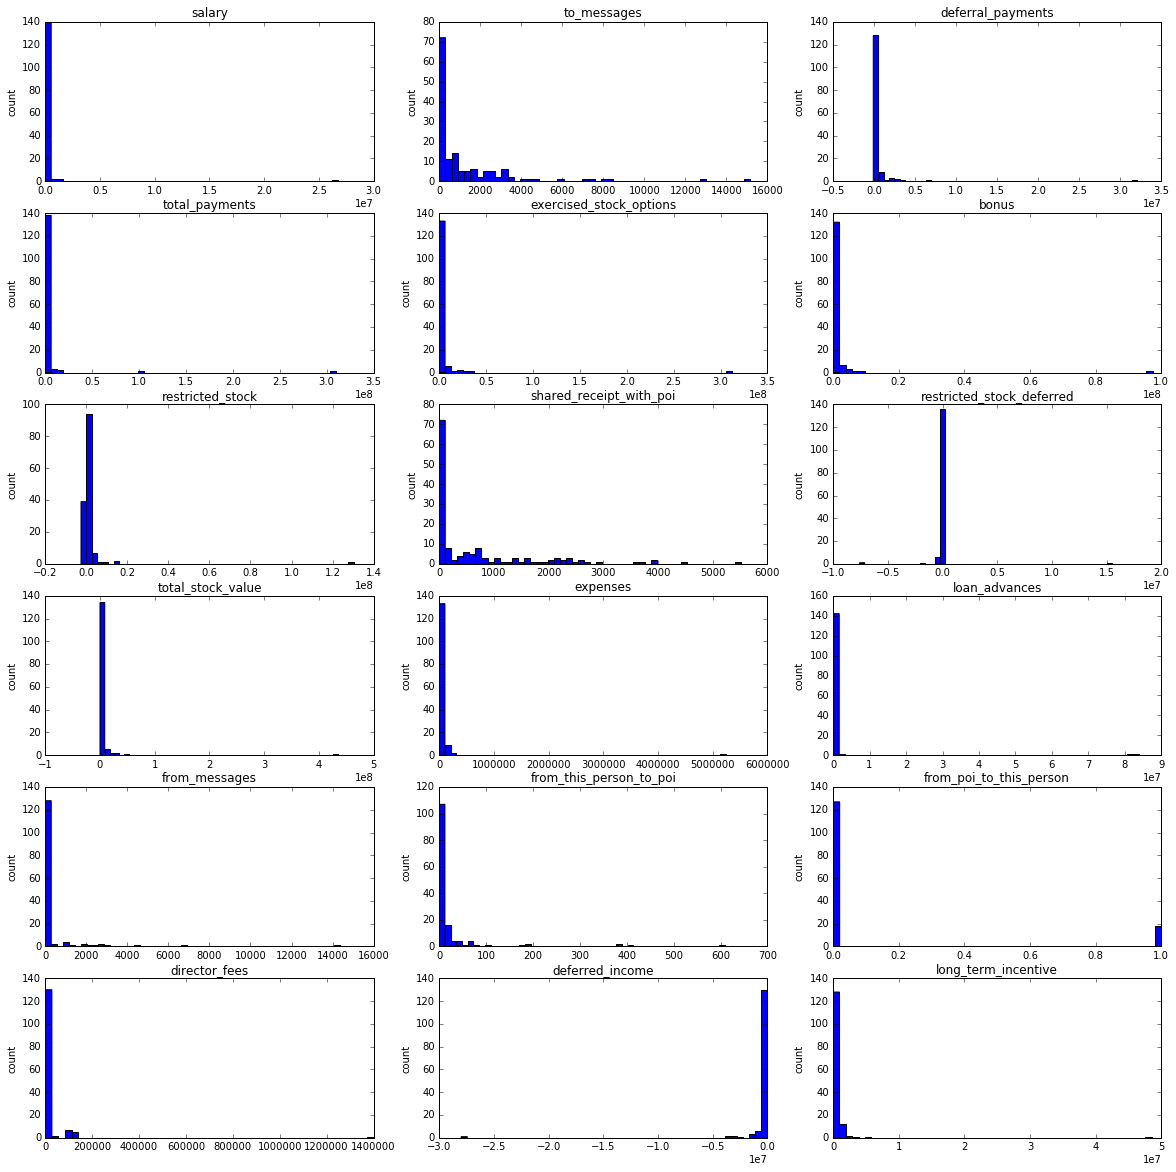

In [9]:
### Create new features list without poi
features_list_new = [ii for ii in features_list if ii != "poi"]

%matplotlib inline
### 20 histograms for features
plt.rcParams["figure.figsize"] = (20,20)
f, axarr = plt.subplots(6, 3)

### the histogram of the data
### x: x coordinate values, y: y coordinate values
### r: row index, c: column index
### title: title of a subplot
def subplot_histogram(x, bins, r, c, title):
    axarr[r, c].hist(x, bins = bins)
    axarr[r, c].set_title(title)
    axarr[r, c].set_ylabel("count")

for i in range(len(features_list_new)):
    subplot_histogram(data[:,i],50,i/3,i%3,features_list_new[i])

plt.show()

Above diagrams show 19 histograms. I first created new list of features excluding poi because array of poi consists of only true or false so it won't provide an insightful histogram. 

Looking at these histograms, I can see there are outliers for every feature.

I will look into salary more deeply and see if there is any interesting thing going on.

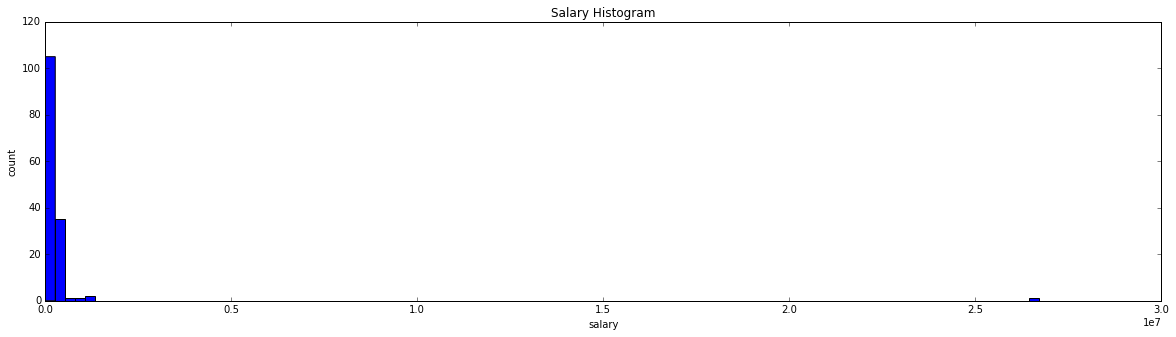

In [10]:
%matplotlib inline
### Find indices for salary
salary_ind = features_list.index("salary")

### Set the size of the plot
plt.rcParams["figure.figsize"] = (20,5)

### Draw Salary histogram
plt.hist(data[:,salary_ind], bins=100)
plt.xlabel("salary")
plt.ylabel("count")
plt.title("Salary Histogram")
plt.show()

Now I will get rid of the outlier above 2.5e7 and replot the histogram

53408458.0 is the total sum of salaries
26704229.0 is removed


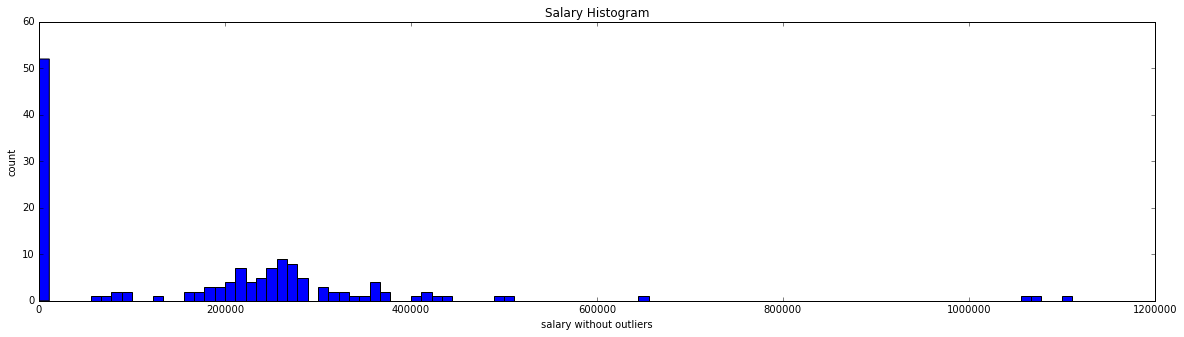

In [11]:
### Total sum of salaries
import numpy as np
print np.sum(data[:,salary_ind]), "is the total sum of salaries"

### Create new array that contains salar values without outliers
salary_no_outliers = []
for i in data[:,salary_ind]:
    if i < 2.5e7:
        salary_no_outliers.append(i)
    else:
        print i, "is removed"

### Draw Salary histogram
plt.hist(salary_no_outliers, bins=100)
plt.xlabel("salary without outliers")
plt.ylabel("count")
plt.title("Salary Histogram")
plt.show()

The outlier removed is half of the total sum of salary array, which means someone added a total sum of salaries into the data. I believe that in data_dict there is a key that contains the sum of every feature.

In [12]:
for k,v in data_dict.iteritems():
    if v["salary"] == 26704229.0:
        print k,v

TOTAL {'salary': 26704229, 'to_messages': 'NaN', 'deferral_payments': 32083396, 'total_payments': 309886585, 'exercised_stock_options': 311764000, 'bonus': 97343619, 'restricted_stock': 130322299, 'shared_receipt_with_poi': 'NaN', 'restricted_stock_deferred': -7576788, 'total_stock_value': 434509511, 'expenses': 5235198, 'loan_advances': 83925000, 'from_messages': 'NaN', 'other': 42667589, 'from_this_person_to_poi': 'NaN', 'poi': False, 'director_fees': 1398517, 'deferred_income': -27992891, 'long_term_incentive': 48521928, 'email_address': 'NaN', 'from_poi_to_this_person': 'NaN'}


As I expected one of the keys in data_dict is TOTAL. I will create a new dictionary that excludes this key.

In [13]:
### New data_dict excluding TOTAL key
data_dict_new = {}

for k, v in data_dict.iteritems():
    if k != "TOTAL":
        data_dict_new[k] = v

### Print out the new data_dict length
print "The length of the new data_dict:", len(data_dict_new)
    

The length of the new data_dict: 145


Now there are 145 data in the data_dict_new. I will graph the histograms again.

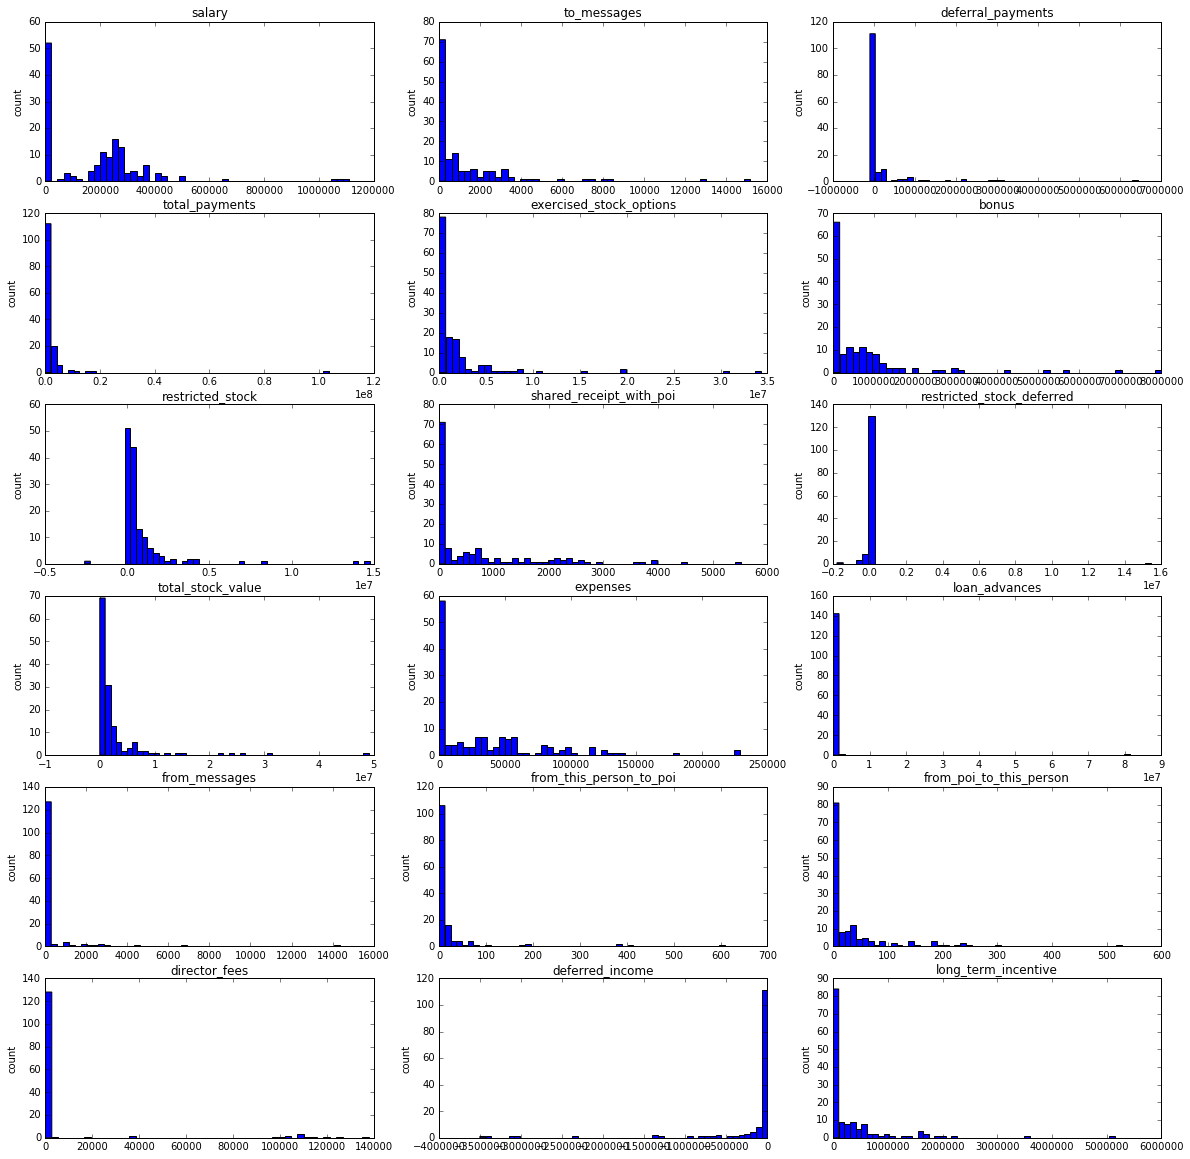

In [14]:
### Convert data_dict_new into numpy array
data = featureFormat(data_dict_new, features_list)

%matplotlib inline
### 20 histograms for features
plt.rcParams["figure.figsize"] = (20,20)
f, axarr = plt.subplots(6, 3)

### the histogram of the data
### x: x coordinate values, y: y coordinate values
### r: row index, c: column index
### title: title of a subplot
def subplot_histogram(x, bins, r, c, title):
    axarr[r, c].hist(x, bins = bins)
    axarr[r, c].set_title(title)
    axarr[r, c].set_ylabel("count")

for i in range(len(features_list_new)):
    subplot_histogram(data[:,i],50,i/3,i%3,features_list_new[i])

plt.show()

The histograms are better than before. Although there are still outliers in histograms, getting rid of them might not be a good idea because those values may be helpful identifying POI's.

I suspect that some of these features will have too many zeros because featureFormat function convert NaN to zero in some cases. I will print out the number of zeros for each feature. 

In [15]:
### defining function that counts zeros
def counting_zeros(data, features_list, feature):
    total_count = 0
    count = 0
    feature_data = data[:,features_list.index(feature)]
    for i in feature_data:
        total_count += 1
        if i == 0:
            count += 1
    print "{}: {}, {}%".format(feature,count, int(float(count)*100/float(total_count)))

### Printing out the number of zeros for each feature
for i in features_list[:-1]:
    counting_zeros(data, features_list, i)

salary: 50, 34%
to_messages: 58, 40%
deferral_payments: 106, 73%
total_payments: 20, 13%
exercised_stock_options: 43, 29%
bonus: 63, 43%
restricted_stock: 35, 24%
shared_receipt_with_poi: 58, 40%
restricted_stock_deferred: 127, 88%
total_stock_value: 19, 13%
expenses: 50, 34%
loan_advances: 141, 97%
from_messages: 58, 40%
from_this_person_to_poi: 78, 54%
from_poi_to_this_person: 70, 48%
director_fees: 128, 88%
deferred_income: 96, 66%
long_term_incentive: 79, 54%


I will ignore features with more than 60% of zeros from now on.

### Features that will be ignored:
- deferral_payments
- restricted_stock_deferred
- loan_advances
- director_fees
- deferred_income

I will recreate data numpy array and features_list array that exclude the features above.

In [16]:
### Save the original features_list before change
features_list_original = features_list

### list of features with too many zeros
too_many_zeros = ["deferral_payments", 
                  "restricted_stock_deferred",
                  "loan_advances",
                  "director_fees",
                  "deferred_income"]

### remove the above features from features_list
for i in too_many_zeros:
    if i in features_list:
        features_list.remove(i)
        
### Convert data_dict_new into numpy array
data = featureFormat(data_dict_new, features_list)
print data.shape

(144L, 14L)


Now the number of columns of data is reduced to 14.

### Checking Scores

Now I am going to test each feature using GaussianNB and check the accuracy, precision and recall. Then I will use features with high values for later use.

I will employ tester functions from tester.

In [17]:
### Import functions from tester_edited.py
from tester_edited import load_classifier_and_data, test_classifier
from sklearn.cross_validation import StratifiedShuffleSplit

This will be a repetitive process so I will create a function to do this.

In [18]:
### the code is from "poi_id.py" from final_project folder.
### this function will split the data into test and train
### apply classifier and calculate the accuracy, precision and recall
def test(features_list,clf, print_result=False, draw_graph=False, rescale=False):
    ### Store to my_dataset for easy export below.
    my_dataset = data_dict
    
    ### Extract features and labels from dataset for local testing
    data = featureFormat(my_dataset, features_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)
    
    ### Split train and test by 30 %
    from sklearn.cross_validation import train_test_split
    features_train, features_test, labels_train, labels_test = \
        train_test_split(features, labels, test_size=0.3, random_state=42)
    dump_classifier_and_data(clf, my_dataset, features_list)
    
    ### Print out the result
    clf, dataset, feature_list = load_classifier_and_data()
    scores = test_classifier(
        clf, dataset, feature_list, 
        print_result=print_result, draw_graph=draw_graph, rescale=rescale)
    return scores

### import GaussianNB
from sklearn.naive_bayes import GaussianNB

### import Decision Tree
from sklearn import tree

### This function only test the data using
### GaussianNB and Decision Tree
def classify_simple(features_list, print_result=False):
    print "Features list:", features_list[1:]
    
    ### Set GaussianNB
    clf_NB = GaussianNB()

    ### Set Decision Tree
    clf_tree = tree.DecisionTreeClassifier()
    
    ### Call test function and print out test
    scores_NB = test(features_list,clf_NB, print_result=print_result)
    tree_NB = test(features_list,clf_tree, print_result=print_result)
    return [ scores_NB, tree_NB ]

I created a function that can show the accuracy, precision and recall values from features list input. The purpose is not to get the largest scores but to select features that show the high scores compared to the others. So I didn't specify any parameters for now. The parameters will be adjusted at a later section.

In [19]:
### Always put poi at the zeroth index
classify_simple(["poi", "salary"],print_result=True)

Features list: ['salary']
GaussianNB()

Best parameters:
No GridSearch

	Accuracy: 0.25560	Precision: 0.18481	Recall: 0.79800	F1: 0.30011	F2: 0.47968
	Total predictions: 20000	True positives: 3192	False positives: 14080	False negatives:  808	True negatives: 1920

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Best parameters:
No GridSearch

	Accuracy: 0.69210	Precision: 0.23619	Recall: 0.24150	F1: 0.23881	F2: 0.24042
	Total predictions: 20000	True positives:  966	False positives: 3124	False negatives: 3034	True negatives: 12876



[[0.2556, 0.18480778138026865, 0.798], [0.6921, 0.23618581907090463, 0.2415]]

I ran the function using poi and salary. Fortunately the function works.

I will use this function for all the other features.

In [20]:
### Iterate over the features_list
scores_list = {}
for i in features_list[:-1]:
    scores_list[i] = classify_simple(["poi", i])

Features list: ['salary']
Features list: ['to_messages']
Got a divide by zero when trying out: GaussianNB()
Precision or recall may be undefined due to a lack of true positive predicitons.
Features list: ['total_payments']
Features list: ['exercised_stock_options']
Features list: ['bonus']
Features list: ['restricted_stock']
Features list: ['shared_receipt_with_poi']
Got a divide by zero when trying out: GaussianNB()
Precision or recall may be undefined due to a lack of true positive predicitons.
Features list: ['total_stock_value']
Features list: ['expenses']
Features list: ['from_messages']
Got a divide by zero when trying out: GaussianNB()
Precision or recall may be undefined due to a lack of true positive predicitons.
Features list: ['from_this_person_to_poi']
Got a divide by zero when trying out: GaussianNB()
Precision or recall may be undefined due to a lack of true positive predicitons.
Features list: ['from_poi_to_this_person']
Features list: ['long_term_incentive']


In [21]:
### Print out scores of each feature
print "      Accuarcy Precision Recall"
for k,v in scores_list.iteritems():
    print k
    if v[0] == None:
        print "NB     ---------None---------"
    else:
        print "NB     {0:.4f}  {1:.4f}  {2:.4f}".format(v[0][0], v[0][1], v[0][2])
    print "tree   {0:.4f}  {1:.4f}  {2:.4f}".format(v[1][0], v[1][1], v[1][2])

      Accuarcy Precision Recall
salary
NB     0.2556  0.1848  0.7980
tree   0.6921  0.2362  0.2415
to_messages
NB     ---------None---------
tree   0.7371  0.0856  0.1410
total_payments
NB     0.7631  0.0694  0.0435
tree   0.7393  0.0804  0.0665
bonus
NB     0.3780  0.2223  0.7200
tree   0.7623  0.4427  0.2685
total_stock_value
NB     0.8406  0.3200  0.0320
tree   0.7584  0.2300  0.2430
shared_receipt_with_poi
NB     ---------None---------
tree   0.8421  0.3020  0.3210
exercised_stock_options
NB     0.8994  0.2108  0.0390
tree   0.8571  0.2686  0.3320
from_messages
NB     ---------None---------
tree   0.7259  0.0067  0.0100
from_this_person_to_poi
NB     ---------None---------
tree   0.7444  0.0218  0.0180
long_term_incentive
NB     0.3980  0.1471  0.6700
tree   0.6943  0.0250  0.0300
expenses
NB     0.3068  0.1885  0.7460
tree   0.6466  0.1295  0.1340
restricted_stock
NB     0.7380  0.1013  0.0560
tree   0.7297  0.1196  0.0765
from_poi_to_this_person
NB     0.7365  0.0263  0.0015
tree

Notice that those features where NB score is zero have zeros more than 50%. Initially I thought removing features with zeros more than 60% might be sufficient but apparently I should have set my threshold to be 60% instead of 50%.

And I will remove total_payments from my list because this feature has precision and recall values less than 1%.

In [22]:
### list of features with too many zeros above 50%
too_many_zeros = ["to_messages",
                  "shared_receipt_with_poi",
                  "from_messages",
                  "from_this_person_to_poi",
                  "total_payments"]

### remove the above features from features_list
for i in too_many_zeros:
    if i in features_list:
        features_list.remove(i)
        
### Convert data_dict_new into numpy array
data = featureFormat(data_dict_new, features_list)
print "Shape of data:", data.shape
pprint.pprint(features_list)

Shape of data: (139L, 9L)
['salary',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'total_stock_value',
 'expenses',
 'from_poi_to_this_person',
 'long_term_incentive',
 'poi']


The number of columns are reduced to 9 including poi. Let's print the result again only from these features.

In [23]:
### Print out scores of each feature
print "      Accuarcy Precision Recall"
for k,v in scores_list.iteritems():
    if k in features_list:
        print k
        if v[0] == None:
            print "NB     ---------None---------"
        else:
            print "NB     {0:.4f}  {1:.4f}  {2:.4f}".format(v[0][0], v[0][1], v[0][2])
        print "tree   {0:.4f}  {1:.4f}  {2:.4f}".format(v[1][0], v[1][1], v[1][2])

      Accuarcy Precision Recall
salary
NB     0.2556  0.1848  0.7980
tree   0.6921  0.2362  0.2415
bonus
NB     0.3780  0.2223  0.7200
tree   0.7623  0.4427  0.2685
total_stock_value
NB     0.8406  0.3200  0.0320
tree   0.7584  0.2300  0.2430
exercised_stock_options
NB     0.8994  0.2108  0.0390
tree   0.8571  0.2686  0.3320
long_term_incentive
NB     0.3980  0.1471  0.6700
tree   0.6943  0.0250  0.0300
expenses
NB     0.3068  0.1885  0.7460
tree   0.6466  0.1295  0.1340
restricted_stock
NB     0.7380  0.1013  0.0560
tree   0.7297  0.1196  0.0765
from_poi_to_this_person
NB     0.7365  0.0263  0.0015
tree   0.6425  0.1312  0.0765


From the result above, the features with the best scores are **bonus**, **exercised_stock_options** and **total_stock_value**.
I will use these features as my main dependent variables for the bivariate analysis.

## Bivariate Analysis

In bivariate analysis section, I will investigate the relationship between two features.
Below is the list of pairs of features I am going to see.

**Pairs of Best features**
- bonus and exercised_stock_options
- bonus and total_stock_value
- exercised_stock_options and total_stock_value

**Best features and others** *x is bonus, exercised_stock_options or total_stock_value*
- x and salary
- x and restricted_stock
- x and expenses
- x and from_poi_to_this_person
- x and long_term_incentive

There are total 18 scatter plots. For each scatter plot, if I see something interesting, I will use Naive Bayes and SVM (rdf) to see the accuracy, precision and recall.

At the end of this section, I will gather the pairs of features with high positive correlation for PCA. I will combine the pairs of features with the largest accuracy and use them for the further analysis.

### Bonus and Exercised Stock Options

I will first check the relationship between bonus and exercised_stock_options by graphing a scatter plot.

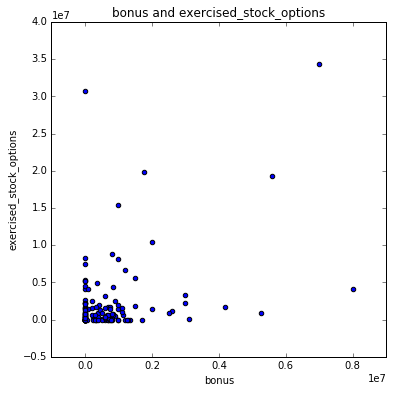

In [24]:
%matplotlib inline
### Set the size of the plot
plt.rcParams["figure.figsize"] = (6,6)

### Draw Salary histogram
plt.scatter(data[:,features_list.index("bonus")], data[:,features_list.index("exercised_stock_options")])
plt.xlabel("bonus")
plt.ylabel("exercised_stock_options")
plt.title("bonus and exercised_stock_options")
plt.show()

I will add colors to this scatter plot. I will color the points from poi to be red and the others to be blue.

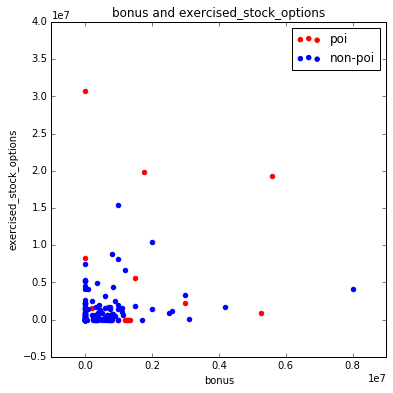

In [25]:
%matplotlib inline
### Set the size of the plot
plt.rcParams["figure.figsize"] = (6,6)

### Reassign poi index
poi_ind = features_list.index("poi")
bon_ind = features_list.index("bonus")
eso_ind = features_list.index("exercised_stock_options")

### Create arrays for salary and bonus for poi and non-poi
bon_poi     = [data[:,bon_ind][ii] for ii in range(0, len(data[:,0])) if data[:,poi_ind][ii]]
eso_poi     = [data[:,eso_ind][ii] for ii in range(0, len(data[:,0])) if data[:,poi_ind][ii]]
bon_nonpoi  = [data[:,bon_ind][ii] for ii in range(0, len(data[:,0])) if not data[:,poi_ind][ii]]
eso_nonpoi  = [data[:,eso_ind][ii] for ii in range(0, len(data[:,0])) if not data[:,poi_ind][ii]]

### Draw Salary histogram
plt.scatter(bon_poi,eso_poi,color="r",label="poi")
plt.scatter(bon_nonpoi,eso_nonpoi,color="b",label="non-poi")
plt.legend()
plt.xlabel("bonus")
plt.ylabel("exercised_stock_options")
plt.title("bonus and exercised_stock_options")
plt.show()

The cluster at the left bottom corner doesn't tell us much. It is difficult to identify any pattern in this cluster.

There are 4 poi at the upper right corner that are seperated from the cluster.

Now let's use these features and see how accurately they find POI's.

I will use **GaussianNB**, **DecisionTree**, **SVM** and **KNN** using various parameters.

This will be a repititive process so I will create functions for each classifiers.

## Functions of Classifiers
### Creating classify_advanced function

In [29]:
### Use GridSearchCV to find the best parameters
from sklearn.grid_search import GridSearchCV

def classify_advanced(features_list, classifiers, 
                      print_result=False, draw_graph=False):
    ### Print out features being classified
    print "Features list:", features_list[1:]
    
    ### Create an empty scores array
    scores = []
    
    ### for each classifier in classifiers calculate scores
    for classifier in classifiers:
        if classifier == "GaussianNB":
            ### set GaussianNB
            clf = GaussianNB()
            
        elif classifier == "DecisionTree":
            ### set Decision Tree
            param_grid = {
                'criterion': ['gini', 'entropy'],
                'splitter' : ['best', 'random'],
                'min_samples_split': range(2,10)
                  }
            clf = GridSearchCV(tree.DecisionTreeClassifier(), param_grid)
        
        elif classifier == "SVM":
            from sklearn import svm
            param_grid = {
                'kernel': ['rbf', 'linear', 'poly'],
                'degree': [1,2,3,4,5],
                'gamma': ['auto', 0.1, 0.3, 0.5, 0.7]
                }
            clf = GridSearchCV(svm.SVC(), param_grid)
        
        elif classifier == "KNN":
            from sklearn.neighbors import KNeighborsRegressor
            param_grid = {
                'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto','ball_tree','kd_tree','brute']
            }
            clf = GridSearchCV(KNeighborsRegressor(), param_grid)
            
        ### Call test function and print out test
        scores.append(test(
                features_list,clf,
                print_result=print_result, draw_graph=draw_graph, rescale=True))
    
    return scores

This function will be used whenever I check the scores for any combination of features. If I want to use GaussianNB then I just need to set 'classifiers = ["GaussianNB"]'. I can use multiple classifiers if I put 'classifiers = ["GaussianNB", "DecisionTree", "SVM"]'. In this case, the function prints out test scores for each classifier and shows the best parameter to be used.

draw_graph parameter will draw a scatter plot from test set where red shaded area predicts poi and blue shaded area predicts non-poi.

I will try to use this function with 'bonus' and 'exercised_stock_options' and see if the function works ok.

### Bonus and Exercised Stock Options - Decision Tree

In [27]:
%matplotlib inline
features = ['poi', 'bonus', 'exercised_stock_options']
classifiers = ['DecisionTree']
classify_advanced(features, classifiers, print_result=True, draw_graph=True)

Features list: ['bonus', 'exercised_stock_options']


KeyboardInterrupt: 

The function works find and the result is shown above.
- Accuracy: ~ 83.3%
- Precision: ~ 44.2%
- Recall: ~ 31.6%

*The scores will be slightly different because the algorithm splits the data into test and train randomly.*

Although the scores are very nice, the problem is very obvious when you look at the graph.
All of the test points are in the non-poi area and the reason why the scores could be so high is because the majority in the cluster at the left bottom corner is non-poi. So if we predict everything at these area to be non-poi then we will have pretty decent scores.

Let's try calculate scores again with different classfiers.

### Bonus and Exercised Stock Options - GaussianNB

In [ ]:
%matplotlib inline
features = ['poi', 'bonus', 'exercised_stock_options']
classifiers = ['GaussianNB']
classify_advanced(features, classifiers, print_result=True, draw_graph=True)

GaussianNB doesn't have parameters according to the document from sklearn. So this will be the faster to run than DecisionTree or SVM.

The scores are shown above. *(The scores will be slightly different as I mentioned above.)*

- Accuracy: 19.7 %
- Precision: 12.5 %
- Recall: 70%

Although recall is quite high but other scores are pretty low.  So GaussianNB is not a good classifier to use for these features.

### Bonus and Exercised Stock Options - SVM

In [ ]:
%matplotlib inline
features = ['poi', 'bonus', 'exercised_stock_options']
classifiers = ['SVM']
classify_advanced(features, classifiers, print_result=True, draw_graph=True)

Error occurs. This error occurs when there are too many zeros. I guess SVM requires more non zero values than GaussianNB and DecisionTree. I am not completely sure here so I will adress this problem later.

### Bonus and Exercised Stock Options - KNN

Features list: ['bonus', 'exercised_stock_options']
drawing


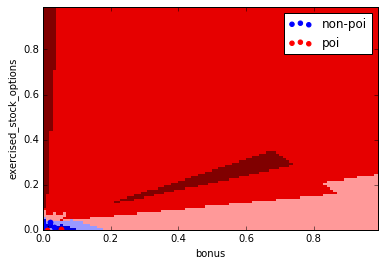

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params={}, iid=True, n_jobs=1, param_grid={'n_neighbors': [7]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

Best parameters:
{'n_neighbors': 7}

	Accuracy: 0.85569	Precision: 0.58732	Recall: 0.20850	F1: 0.30775	F2: 0.23938
	Total predictions: 26000	True positives:  834	False positives:  586	False negatives: 3166	True negatives: 21414



[[0.8556923076923076, 0.5873239436619718, 0.2085]]

In [30]:
%matplotlib inline
features = ['poi', 'bonus', 'exercised_stock_options']
classifiers = ['KNN']
classify_advanced(features, classifiers, print_result=True, draw_graph=True)

### Salary and long_term_incentive

Similar to what I did before, I will plot the scatter plot for salary and long_term_incentive.

Before plotting, I will first create a function for the scatter plot because the codes will be redundant.

In [ ]:
%matplotlib inline
### Set the size of the plot
plt.rcParams["figure.figsize"] = (6,6)

### function for scatter plots
def scatter_plotting(x,y):
    ### Find index of x and y
    x_ind = features_list.index(x)
    y_ind = features_list.index(y)
    
    ### Create arrays for salary and bonus for poi and non-poi
    x_poi    = [data[:,x_ind][ii] for ii in range(0, len(data[:,0])) if data[:,poi_ind][ii]]
    y_poi    = [data[:,y_ind][ii] for ii in range(0, len(data[:,0])) if data[:,poi_ind][ii]]
    x_nonpoi = [data[:,x_ind][ii] for ii in range(0, len(data[:,0])) if not data[:,poi_ind][ii]]
    y_nonpoi = [data[:,y_ind][ii] for ii in range(0, len(data[:,0])) if not data[:,poi_ind][ii]]

    ### Draw Salary histogram
    plt.scatter(x_poi,   y_poi,   color="r",label="poi")
    plt.scatter(x_nonpoi,y_nonpoi,color="b",label="non-poi")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title("{} and {}".format(x, y))
    plt.show()
    
scatter_plotting("salary","long_term_incentive")

I will use long_term_incentive as one of features for classifier.

### More plots

From now on I will keep drawing the scatter plots until I see any interesting plot.

In [ ]:
scatter_plotting("salary","exercised_stock_options")